In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sns

In [7]:
data = pd.read_csv('HospitalAdmissionsData.csv')
data.head()

,ID,AdmissionLengthDays,Death_1,Admission_Type,Insurance_Type,EnglishLanguage_1,Religion_Type,Married_1,Race,Dx
0,42862,4.277778,0,elective,private,1,episcopalian,1,white,mitral stenosis\mitral valve replacement /sda
1,5967,26.122917,0,elective,private,0,catholic,1,white,duodenal mass/sda
2,50952,7.028472,1,emergency,medicare,1,catholic,0,asian - japanese,? serotonin syndrome
3,17138,34.187500,0,elective,medicare,1,catholic,1,white,abdominal aortic aneurysm/sda
4,27703,6.165972,0,elective,government,0,protestant quaker,0,black/african american,absence/sda


# a.
The features are:

In [8]:
data.columns

Index(['ID', 'AdmissionLengthDays', 'Death_1', 'Admission_Type',
       'Insurance_Type', 'EnglishLanguage_1', 'Religion_Type', 'Married_1',
       'Race', 'Dx'],
      dtype='object')

# b.
There's only one column with float dtype in the original data:

In [84]:
data.dtypes

ID                       int64
AdmissionLengthDays    float64
Death_1                  int64
Admission_Type          object
Insurance_Type          object
EnglishLanguage_1        int64
Religion_Type           object
Married_1                int64
Race                    object
Dx                      object
log_adm_len            float64
dtype: object

# c.

In [17]:
data.dtypes[data.dtypes == 'object']

Admission_Type    object
Insurance_Type    object
Religion_Type     object
Race              object
Dx                object
dtype: object

# d.

In [85]:
data['Insurance_Type'].unique()

array(['private', 'medicare', 'government', 'medicaid', 'self pay'],
      dtype=object)

# e.

In [19]:
data['AdmissionLengthDays'].describe()

count    58863.000000
mean        10.138978
std         12.465611
min         -0.945139
25%          3.743056
50%          6.465972
75%         11.798264
max        294.660417
Name: AdmissionLengthDays, dtype: float64

# f.

In [33]:
data[['Admission_Type', 'Insurance_Type', 'Religion_Type', 'Dx']].describe().loc['top']

Admission_Type    emergency
Insurance_Type     medicare
Religion_Type      catholic
Dx                  newborn
Name: top, dtype: object

# g.

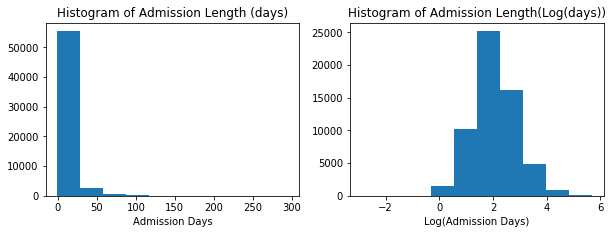

In [56]:
plt.figure(figsize=(10,7))
plt.subplot(2, 2,1)
plt.hist(data['AdmissionLengthDays'])
plt.xlabel('Admission Days')
plt.title('Histogram of Admission Length (days)')
plt.subplot(2,2,2)
plt.hist(np.log(1 + data['AdmissionLengthDays']))
plt.xlabel('Log(Admission Days)')
plt.title('Histogram of Admission Length(Log(days))')
plt.show()

Some of the values are negative, so in the above I added 1 before taking the log:

In [55]:
print('# of negative values: ',np.sum(data['AdmissionLengthDays'] < 0))
print('The minimum value: ', np.min(data['AdmissionLengthDays']))

# of negative values:  98
The minimum value:  -0.9451388890000001


# h.

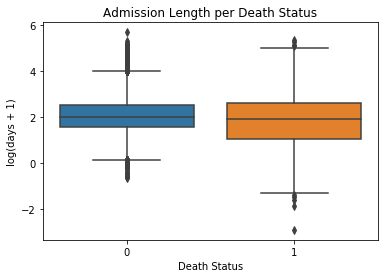

In [62]:
data['log_adm_len'] = np.log( 1 + data['AdmissionLengthDays'])
sns.boxplot(x = 'Death_1', y = 'log_adm_len', data = data )
plt.xlabel('Death Status')
plt.ylabel('log(days + 1)')
plt.title('Admission Length per Death Status')
plt.show()

# i.

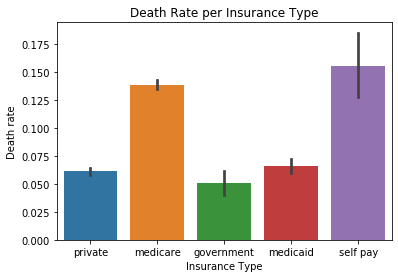

In [83]:
sns.barplot(x = 'Insurance_Type', y = 'Death_1', data = data)
plt.title('Death Rate per Insurance Type')
plt.xlabel('Insurance Type')
plt.ylabel('Death rate')
plt.show()